In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [63]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [100]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [19]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
StandardScaler.fit()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [53]:
aa = train_data.dtypes.index
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [229]:
dataset = [train_data, test_data]
for data in dataset:
    categorical_columns = [x for x in data.dtypes.index if (data.dtypes[x] == 'object' and x != 'Loan_ID')]
    #segregate categorical features and remove loan id from categorical columns

#print the frequency of categorical values    
for col in categorical_columns:
    print(f"\nnumber of categories in {col}")
    print(train_data[col].value_counts())
    


number of categories in Gender
Male      489
Female    112
Name: Gender, dtype: int64

number of categories in Married
Yes    398
No     213
Name: Married, dtype: int64

number of categories in Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

number of categories in Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

number of categories in Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

number of categories in Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [91]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

C:\Users\erkarav\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

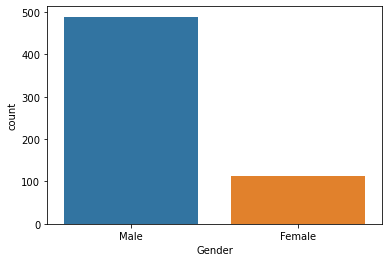

In [92]:
sns.countplot(train_data['Gender'])

<AxesSubplot:xlabel='Gender'>

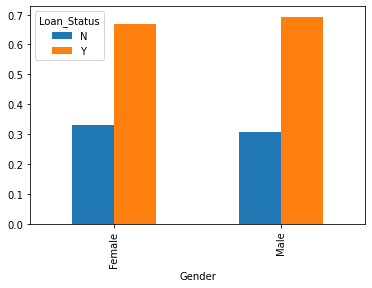

In [127]:
pd.crosstab(train_data['Gender'], train_data['Loan_Status'], normalize='index').plot(kind='bar')

In [195]:
train_data.Married.mode()[0]

'Yes'

In [230]:
#Fill NaN values in a particular column in train data with dominant value
train_data['Gender'] = train_data.Gender.fillna(train_data.Gender.mode()[0])
train_data['Married'] = train_data.Married.fillna(train_data.Married.mode()[0])
train_data['Dependents'] = train_data.Dependents.fillna(train_data.Dependents.mode()[0])
train_data['Self_Employed'] = train_data.Self_Employed.fillna(train_data.Self_Employed.mode()[0])
train_data['LoanAmount'] = train_data.LoanAmount.fillna(train_data.LoanAmount.mean())
train_data['Loan_Amount_Term'] = train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.mode()[0])
train_data['Credit_History'] = train_data.Credit_History.fillna(train_data.Credit_History.mode()[0])

In [231]:
#Fill NaN values in a particular column in test data with dominant value
test_data['Gender'] = test_data.Gender.fillna(test_data.Gender.mode()[0])
test_data['Married'] = test_data.Married.fillna(test_data.Married.mode()[0])
test_data['Dependents'] = test_data.Dependents.fillna(test_data.Dependents.mode()[0])
test_data['Self_Employed'] = test_data.Self_Employed.fillna(test_data.Self_Employed.mode()[0])
test_data['LoanAmount'] = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())
test_data['Loan_Amount_Term'] = test_data.Loan_Amount_Term.fillna(test_data.Loan_Amount_Term.mode()[0])
test_data['Credit_History'] = test_data.Credit_History.fillna(test_data.Credit_History.mode()[0])

<AxesSubplot:xlabel='Dependents'>

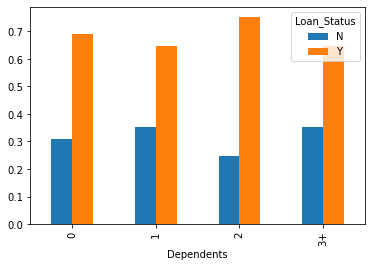

In [122]:
pd.crosstab(train_data['Dependents'], train_data['Loan_Status'], normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='Education'>

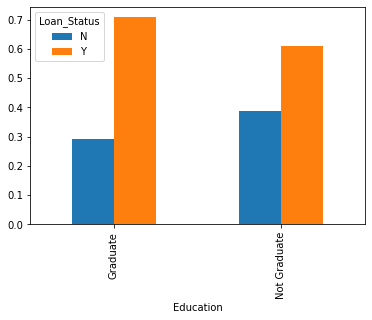

In [128]:
pd.crosstab(train_data['Education'], train_data['Loan_Status'], normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='Self_Employed'>

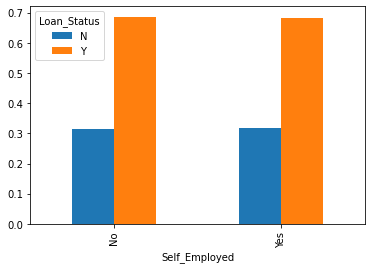

In [130]:
pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'], normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='Property_Area'>

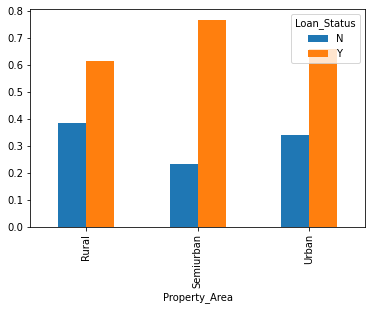

In [132]:
pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'], normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='Credit_History'>

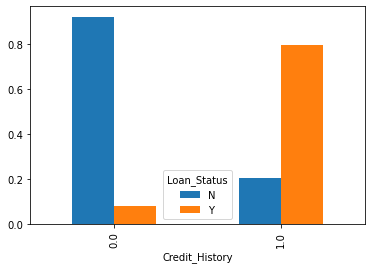

In [143]:
pd.crosstab(train_data.Credit_History, train_data.Loan_Status, normalize='index').plot(kind='bar')

In [232]:
sex = pd.get_dummies(train_data.Gender, drop_first=True)
train_data.drop(['Gender'], axis=1, inplace=True)
train_data = pd.concat([train_data, sex], axis=1)

In [247]:
train_data.isna().sum()

Loan_ID              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Male                 0
Married              0
Not Graduate         0
Semiurban            0
Urban                0
dtype: int64

In [233]:
sex = pd.get_dummies(test_data.Gender, drop_first=True)
test_data.drop(['Gender'], axis=1, inplace=True)
test_data = pd.concat([test_data, sex], axis=1)

In [234]:
dep = {'0':'0', '1':'1', '2':'2', '3+':'3'}
train_data.Dependents = train_data.Dependents.replace(dep).astype(int)
test_data.Dependents = test_data.Dependents.replace(dep).astype(int)

In [205]:
train_data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [235]:
married = pd.get_dummies(train_data.Married, drop_first=True)
train_data.drop(['Married'], axis=1, inplace=True)
train_data = pd.concat([train_data, married], axis=1)

In [236]:
train_data.rename(columns={'Yes':'Married'}, inplace=True)

In [237]:
married = pd.get_dummies(test_data.Married, drop_first=True)
test_data.drop(['Married'], axis=1, inplace=True)
test_data = pd.concat([test_data, married], axis=1)
test_data.rename(columns={'Yes':'Married'}, inplace=True)

In [238]:
graduate = pd.get_dummies(train_data.Education, drop_first=True)
train_data.drop(['Education'], axis=1, inplace=True)
train_data = pd.concat([train_data, graduate], axis=1)

In [239]:
graduate = pd.get_dummies(test_data.Education, drop_first=True)
test_data.drop(['Education'], axis=1, inplace=True)
test_data = pd.concat([test_data, graduate], axis=1)

In [240]:
self_employed = {'No':'0', 'Yes':'1'}
train_data.Self_Employed = train_data.Self_Employed.replace(self_employed).astype(int)
test_data.Self_Employed = test_data.Self_Employed.replace(self_employed).astype(int)

In [219]:
train_data.Self_Employed.value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [220]:
train_data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [241]:
property_area = pd.get_dummies(train_data.Property_Area, drop_first=True)
train_data.drop(['Property_Area'], axis=1, inplace=True)
train_data = pd.concat([train_data, property_area], axis=1)

In [242]:
property_area = pd.get_dummies(test_data.Property_Area, drop_first=True)
test_data.drop(['Property_Area'], axis=1, inplace=True)
test_data = pd.concat([test_data, property_area], axis=1)

In [249]:
train_data.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married,Not Graduate,Semiurban,Urban
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,1
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0
2,LP001005,0,1,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,1
3,LP001006,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,1
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,1


C:\Users\erkarav\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

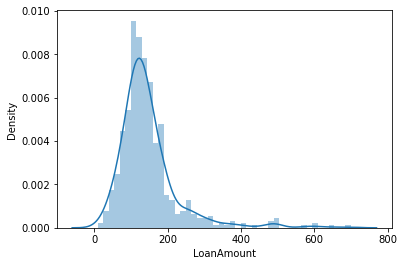

In [251]:
sns.distplot(train_data.LoanAmount)

C:\Users\erkarav\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

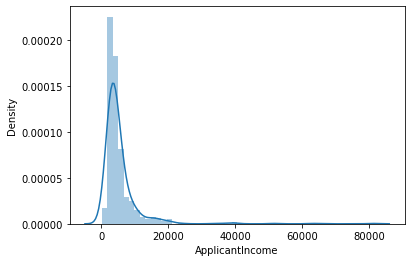

In [440]:
sns.distplot(train_data.ApplicantIncome)

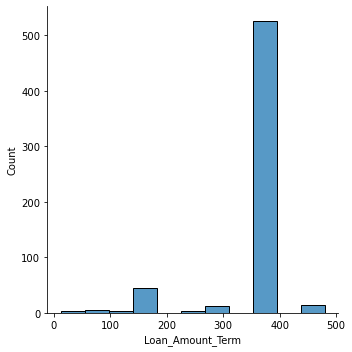

In [439]:
sns.displot(train_data1.Loan_Amount_Term)

C:\Users\erkarav\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


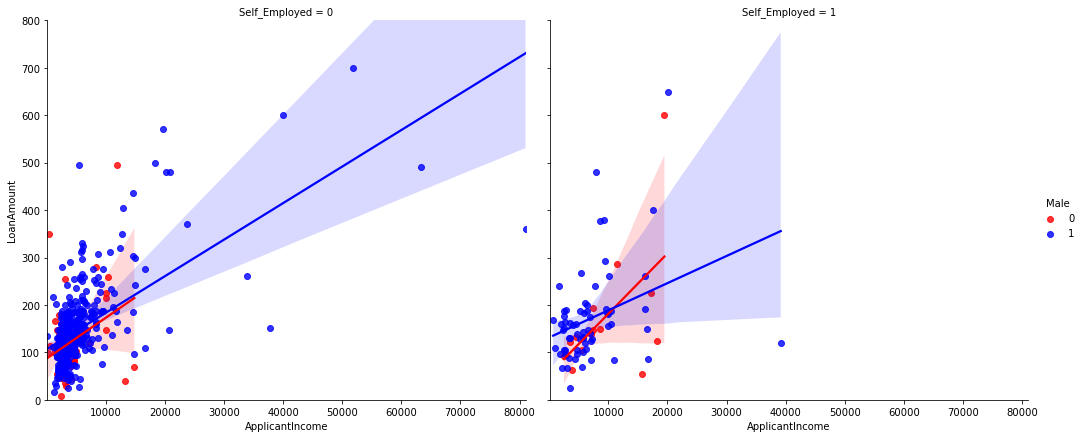

In [260]:
g = sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=train_data, col='Self_Employed', hue='Male',
          palette=['Red', 'Blue', 'Yellow'], aspect=1.2, size=6)
g.set(ylim=(0,800))

In [116]:
train_data.drop(['Loan_ID'], axis=1, inplace=True)

In [117]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
X, y = train_data.drop(['Loan_Status'], axis=1), train_data['Loan_Status']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_l = accuracy_score(y_test, y_pred_log, )*100
acc_l

ValueError: could not convert string to float: 'Male'

In [312]:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import joblib
categorical_column_selector = make_column_selector(dtype_include=object)
numerical_column_selector = make_column_selector(dtype_exclude=object)

In [225]:
train_data1 = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data1 = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [226]:
train_data1.drop(['Loan_ID'], axis=1, inplace=True)

In [227]:
train_data1['Gender'] = train_data1.Gender.fillna(train_data1.Gender.mode()[0])
train_data1['Married'] = train_data1.Married.fillna(train_data1.Married.mode()[0])
train_data1['Dependents'] = train_data1.Dependents.fillna(train_data1.Dependents.mode()[0])
train_data1['Self_Employed'] = train_data1.Self_Employed.fillna(train_data1.Self_Employed.mode()[0])
train_data1['LoanAmount'] = train_data1.LoanAmount.fillna(train_data1.LoanAmount.mean())
train_data1['Loan_Amount_Term'] = train_data1.Loan_Amount_Term.fillna(train_data1.Loan_Amount_Term.mode()[0])
train_data1['Credit_History'] = train_data1.Credit_History.fillna(train_data1.Credit_History.mode()[0])

In [228]:
X1, y1 = train_data1.drop(['Loan_Status', 'Loan_Amount_Term'], axis=1), pd.DataFrame(train_data1['Loan_Status'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [259]:
numerical_column = numerical_column_selector(X_train1)
categorical_column = categorical_column_selector(X_train1)
categorical_column

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [173]:
categorical_preprocessor = OneHotEncoder(drop='first')
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([('Onehot', categorical_preprocessor, categorical_column),
                                  ('scalar', numerical_preprocessor, numerical_column)])

In [174]:
preprocessor1 = preprocessor.fit_transform(train_data1)
preprocessor1.shape, train_data.shape

((614, 13), (614, 12))

In [175]:
pipeline = make_pipeline(preprocessor, LogisticRegression(solver='liblinear', max_iter=500, penalty='l1'))

In [176]:
model = pipeline.fit(X_train1, y_train1)

C:\Users\erkarav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [177]:
y_pred1 = model.predict(X_test1)

In [178]:
acc = accuracy_score(y_test1, y_pred1)
acc

0.7837837837837838

In [183]:
joblib.dump(model, 'regression_model.pkl')

['regression_model.pkl']

In [410]:
numerical_column_train = numerical_column_selector(X1)
categorical_column_train = categorical_column_selector(X1)
preprocessor_data = ColumnTransformer([('Onehot_train', categorical_preprocessor, categorical_column_train),
                                  ('scalar', numerical_preprocessor, numerical_column_train)])

In [411]:
numerical_column_train, categorical_column_train

(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'],
 ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'])

In [412]:
preprocessor_data.fit_transform(X1, y1)

array([[ 1.        ,  0.        ,  0.        , ..., -0.55448733,
         0.        ,  0.41173269],
       [ 1.        ,  1.        ,  1.        , ..., -0.03873155,
        -0.21927331,  0.41173269],
       [ 1.        ,  1.        ,  0.        , ..., -0.55448733,
        -0.957641  ,  0.41173269],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.47240418,
         1.26937121,  0.41173269],
       [ 1.        ,  1.        ,  0.        , ..., -0.55448733,
         0.4833669 ,  0.41173269],
       [ 0.        ,  0.        ,  0.        , ..., -0.55448733,
        -0.15972753, -2.42876026]])

In [597]:
rfc_model = make_pipeline(preprocessor_data, 
                          RandomForestClassifier(n_estimators=300, random_state=42, oob_score=True))
rfc_model.fit(X_train1, y_train1)
y_pred_rfc = rfc_model.predict(X_test1)
acc_rfc = accuracy_score(y_test1, y_pred_rfc)
acc_rfc


C:\Users\erkarav\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.7783783783783784

In [591]:
knn_model = make_pipeline(preprocessor_data, KNeighborsClassifier(n_neighbors=100))
knn_model.fit(X_train1, y_train1)
y_pred_knn = knn_model.predict(X_test1)
acc_knn = accuracy_score(y_test1, y_pred_knn)
acc_knn

C:\Users\erkarav\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.7837837837837838

In [577]:
gbc_model = make_pipeline(preprocessor_data, GradientBoostingClassifier())
gbc_model.fit(X_train1, y_train1)
y_pred_gbc = gbc_model.predict(X_test1)
acc_gbc = accuracy_score(y_test1, y_pred_gbc)
acc_gbc

C:\Users\erkarav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.745945945945946

# Loan Prediction

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
%matplotlib inline

In [271]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [272]:
X, y = train_data.drop(['Loan_Status', 'Loan_Amount_Term', 'Loan_ID'], axis=1), train_data['Loan_Status']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
numerical_column_selector = make_column_selector(dtype_exclude=object)
categorical_column_selector = make_column_selector(dtype_include=object)
preprocessor = 0

In [275]:
categorical_columns = categorical_column_selector(X)
numerical_columns = numerical_column_selector(X)

In [106]:
num_preprocessor = ColumnTransformer([('fillna_num', SimpleImputer(missing_values=np.nan, strategy='mean'), numerical_columns)
                                  ('Scalar', StandardScaler(), numerical_columns)])

In [ ]:
('fillna_cat', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), categorical_columns)

In [276]:
categorical_columns, numerical_columns

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])

In [278]:
ct = ColumnTransformer([('name', StandardScaler(), numerical_columns)], remainder='passthrough')
ct1 = ct.fit_transform(X)
ct1[1]

array([-0.13441195378345122, -0.03873154846446157, -0.21530913196576273,
       0.43286074094635973, 'Male', 'Yes', '1', 'Graduate', 'No', 'Rural'],
      dtype=object)

In [215]:
ctt = ColumnTransformer([('name', OneHotEncoder(drop='first', sparse=False), categorical_column)], remainder='passthrough')
ctt1 = ctt.fit_transform(train_data1)
ctt1.shape

(614, 1003)

In [279]:
col = numerical_columns.copy()
col.extend(categorical_columns)
train_data11 = pd.DataFrame(ct1, columns=col)
train_data11.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.0729908,-0.554487,NaN,0.432861,Male,No,0,Graduate,No,Urban
1,-0.134412,-0.0387315,-0.215309,0.432861,Male,Yes,1,Graduate,No,Rural
2,-0.393747,-0.554487,-0.940328,0.432861,Male,Yes,0,Graduate,Yes,Urban
3,-0.462062,0.25198,-0.30886,0.432861,Male,Yes,0,Not Graduate,No,Urban
4,0.0977284,-0.554487,-0.063289,0.432861,Male,No,0,Graduate,No,Urban


In [289]:
col = [x for x in train_data11.columns if x not in numerical_columns]
col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [30]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
uni = train_data['Property_Area'].unique()

In [16]:
train_data['Education'] = train_data.Education.fillna(train_data.Education.mode()[0])

In [28]:
onehot = OneHotEncoder(drop='first')
edu = onehot.fit_transform(np.resize(train_data.Education, (-1,1)))
edu[3,0]

1.0

In [29]:
train_data.drop(['Education'], axis=1, inplace=True)

In [53]:
edu_d = pd.DataFrame(edu.toarray(), columns=['Not Graduate'])
train_data = pd.concat([train_data, edu_d], axis=1)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Not Graduate
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0


In [57]:
edu_a = edu.toarray()
edu_d

,Not Graduate
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
608,0.0
609,0.0
610,0.0
611,0.0


In [292]:
train_data1.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed         object
ApplicantIncome       object
CoapplicantIncome     object
LoanAmount            object
Loan_Amount_Term      object
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [310]:
np.sum()

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
dtype: object